In [1]:
pwd 

'/work/hpc/potato/SinoNom/src/data/components'

In [3]:
import json 
import numpy as np
from analyzer import Analyzer

In [4]:
import matplotlib.pyplot as plt

# Test

In [26]:
dataset = dict()
with open("../../data/wb_recognition_dataset/manifest.json", "r") as file:
    dataset = json.load(file)

In [27]:
cached_dataset = dict()
with open("../../data/wb_recognition_dataset/manifest_split.json", "r") as file:
    cached_dataset = json.load(file)

In [28]:
train_dataset = dataset['train']
train_cached_dataset = cached_dataset['train']

In [29]:
keys = list(train_dataset.keys())

In [30]:
count = [len(train_dataset[key]) for key in keys]
cached_count = [len(train_cached_dataset[key]) for key in keys]

In [31]:
x = range(0, len(count))

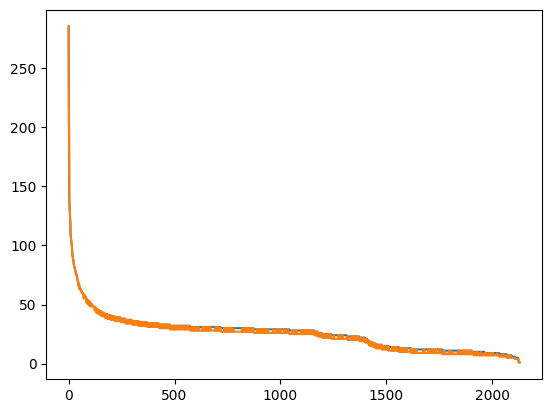

In [32]:
plt.plot(x, count)
plt.plot(x, cached_count)
plt.show()

Seems like it really just mildly downsample, really gud

In [33]:
val_dataset = dataset['val']
cached_dataset['val'].update(cached_dataset['cache'])
val_cached_dataset = cached_dataset['val']


In [34]:
val_cached_dataset?

Type:        dict
String form: {'1677': ['381.jpg', '388.jpg', '373.jpg', '392.jpg', '390.jpg', '387.jpg', '389.jpg', '383.jpg', <...> , '467': ['copy/467_19_467.png'], '647': ['copy/647_26_647.png'], '954': ['copy/954_19_954.png']}
Length:      2130
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

2130 labels shows that it covered the dataset

In [35]:
val_count = [len(val_dataset[key]) if key in val_dataset.keys() else 0 for key in keys]
val_cached_count = [len(val_cached_dataset[key]) for key in keys]

In [36]:
diff = np.sum(cached_count) + np.sum(val_cached_count) - np.sum(val_count) - np.sum(count)
print(diff)

5


Seems like it does it job !!! New manifest approved :D

In [37]:
count = [len(train_dataset[key]) for key in keys]
cached_count = [len(train_cached_dataset[key]) for key in keys]

In [38]:
values, count = np.unique(hard_sample_count, return_counts=True)

NameError: name 'hard_sample_count' is not defined

In [ ]:
pri

In [14]:
for vc in zip(values, count):
    print(vc)

(0, 463)
(1, 634)
(2, 247)
(3, 138)
(4, 123)
(5, 71)
(6, 53)
(7, 44)
(8, 39)
(9, 34)
(10, 33)
(11, 24)
(12, 18)
(13, 8)
(14, 22)
(15, 13)
(16, 11)
(17, 12)
(18, 12)
(19, 6)
(20, 9)
(21, 5)
(22, 4)
(23, 7)
(24, 4)
(25, 5)
(26, 4)
(27, 2)
(28, 6)
(29, 6)
(30, 1)
(31, 3)
(32, 4)
(33, 3)
(34, 3)
(35, 2)
(36, 3)
(37, 2)
(38, 2)
(39, 3)
(41, 1)
(42, 3)
(43, 4)
(44, 1)
(46, 1)
(47, 1)
(48, 2)
(49, 2)
(52, 2)
(53, 2)
(54, 1)
(56, 1)
(58, 1)
(60, 1)
(61, 2)
(62, 1)
(64, 1)
(65, 1)
(67, 1)
(68, 1)
(70, 3)
(74, 1)
(75, 2)
(78, 1)
(79, 1)
(90, 1)
(94, 1)
(100, 1)
(101, 1)
(104, 1)
(114, 1)
(172, 1)
(192, 1)
(255, 1)


# Analyzer

Test with different manifest to test features

In [3]:
analyzer = Analyzer("../../data/manifest_final.json", data_dir='../../data/wb_recognition_dataset', cache_dir='val/cache')

Total samples: 58205


In [4]:
v_mean, v_std, v_dist, v_upsample, v_missing = analyzer.valid_fill_label(0.9)

Mean: 2.339495798319328
Valid mean samples 2.339495798319328
Valid standard deviation 2.816942095782366
Missing labels 4605


In [5]:
print(v_dist)

[32  4  1 ...  0  0  0]


In [6]:
values = list(v_missing.values())
x = range(0, len(v_missing))

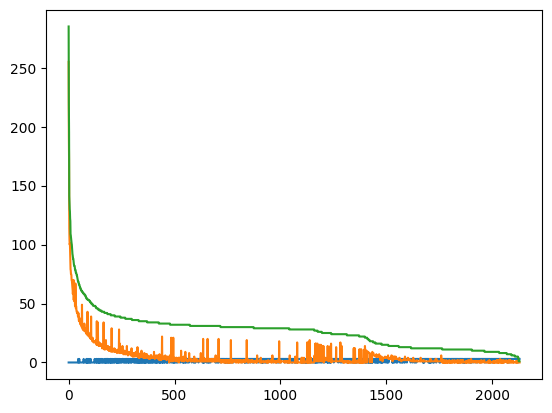

In [7]:
plt.plot(x, values)
plt.plot(x, list(analyzer.train_hard_dist.values()))
plt.plot(x, list(analyzer.train_full_dist.values()))
plt.show()

How the fuck can validation mean can be its own freaking adoijdaiupn standard deviation ????

In [5]:
miss_req, miss_h_req, miss_n_req = analyzer.query_train(v_missing, maximum_exploit=0.2)
up_req, up_h_req, up_n_req = analyzer.query_train(v_upsample, maximum_exploit=0.1)

In [12]:
v_d = np.array(list(analyzer.val_dist.values()))
hr_d = np.array(list(miss_h_req.values()))
nr_d = np.array(list(miss_n_req.values()))
r_d = np.array(list(miss_req.values()))


uhr_d = np.array(list(up_h_req.values()))
unr_d = np.array(list(up_n_req.values()))
ur_d = np.array(list(up_req.values()))

x = range(v_d.shape[0])
sample = v_d + hr_d + nr_d + uhr_d + unr_d 


In [13]:
np.sum(sample == 0)

14

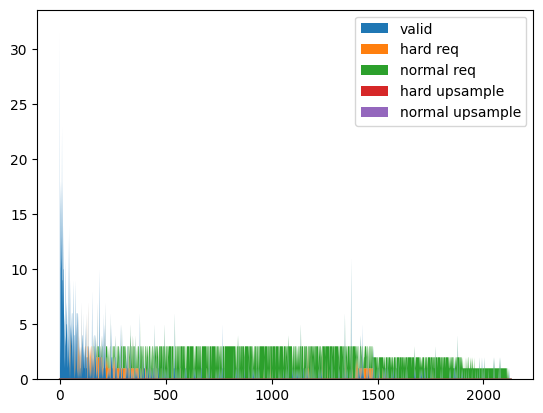

In [14]:

plt.stackplot(x, v_d, hr_d, nr_d, uhr_d, unr_d,
                labels=['valid', 'hard req', 'normal req', 'hard upsample', 'normal upsample'])
plt.legend()
plt.plot(x, unr_d)

plt.show()

Make dir /cache, and /cache/copy

In [6]:
analyzer.extract(miss_req, miss_h_req, miss_n_req, maximum_exploit=0.2, export="../../data/manifest_split.json", refresh=True)

Deleted all contents of the folder: ../../data/wb_recognition_dataset/val/cache
Insufficient dataset, undergo copying samples label 322
Insufficient dataset, undergo copying samples label 822
Insufficient dataset, undergo copying samples label 999
Insufficient dataset, undergo copying samples label 1173
Insufficient dataset, undergo copying samples label 1253
Insufficient dataset, undergo copying samples label 1730
Insufficient dataset, undergo copying samples label 2127
Insufficient dataset, undergo copying samples label 646
Insufficient dataset, undergo copying samples label 1994
Insufficient dataset, undergo copying samples label 96
Insufficient dataset, undergo copying samples label 221
Insufficient dataset, undergo copying samples label 467
Insufficient dataset, undergo copying samples label 647
Insufficient dataset, undergo copying samples label 954
Total samples differences: 14


In [7]:
w = analyzer.train_loss_weight()

In [8]:
plt.plot(x, w)
plt.show()

NameError: name 'x' is not defined

In [15]:
w[0]

0.2940196835841068

In [9]:
analyzer.merge_cache_val(export="../../data/manifest_full.json")

cache/1630_nlvnpf-0140-01-010_crop_63.jpg
cache/1630_nlvnpf-0137-01-026_crop_59.jpg
cache/1630_nlvnpf-0137-01-029_crop_94.jpg
cache/449_nlvnpf-0137-01-016_crop_1.jpg
cache/449_nlvnpf-0137-01-006_crop_7.jpg
cache/449_nlvnpf-0137-01-008_crop_2.jpg
cache/560_nlvnpf-0137-01-041_crop_39.jpg
cache/560_nlvnpf-0137-01-037_crop_11.jpg
cache/560_nlvnpf-0140-01-004_crop_55.jpg
cache/1804_nlvnpf-0140-01-004_crop_130.jpg
cache/1804_nlvnpf-0137-01-002_crop_84.jpg
cache/1804_nlvnpf-0137-01-020_crop_102.jpg
cache/98_nlvnpf-0174-03-010_crop_159.jpg
cache/98_nlvnpf-0174-03-004_crop_44.jpg
cache/98_nlvnpf-0140-01-007_crop_132.jpg
cache/1768_nlvnpf-0137-01-006_crop_16.jpg
cache/1768_nlvnpf-0137-01-026_crop_194.jpg
cache/1768_nlvnpf-0137-01-011_crop_149.jpg
cache/996_nlvnpf-0137-01-016_crop_8.jpg
cache/996_nlvnpf-0137-01-012_crop_13.jpg
cache/996_nlvnpf-0174-03-006_crop_70.jpg
cache/494_nlvnpf-0140-01-012_crop_137.jpg
cache/494_nlvnpf-0140-01-003_crop_52.jpg
cache/494_nlvnpf-0140-01-012_crop_127.jpg
cache/

In [10]:
val_dataset = analyzer.val

In [2]:
import cv2

In [15]:
# data/wb_recognition_dataset/val/cache/copy/954_19_954.png
img = cv2.imread("/work/hpc/potato/SinoNom_recognition/data/augment/mask/train/0/6_0.png")

In [5]:
img.shape

NameError: name 'img' is not defined

In [1]:
plt.imshow(img[:, :, 1])

NameError: name 'plt' is not defined